# Diffusion

In [1]:
import numpy as np
import scipy 
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

### Microscopic aspects of Diffusion 

- Einstein developed a theory of diffusion based on random walk ideas and obtained a key equation relating mean square displacement of particle in d dimensions to time $(t = n \Delta t)$. Generate N random walks with $n$ steps all starting from origin $r_0=0$. 

$$R_n = \sum^{n}_{i=0} r_i$$

- Expressing steps in terms of time increments $n=\frac{t}{\delta t}$ we compute average over N random walkers in $d=1,2,3$ dimenion. 

$$\langle R^2_n\rangle = \sum_i \sum_j \langle r_i r_j \rangle = \sum_i \langle r^2_i \rangle = \sum_i d \cdot \langle \delta x^2_i \rangle =  d \cdot n \cdot  \delta x^2$$

$$\langle R^2_n\rangle =  d \cdot \frac{t}{\delta t}  \cdot \delta x^2$$

- Grouping constants together we define the diffusion coefficient which is expressed in terms of microscopic quantities defined in the random walk model!

$$\langle R^2 (t) \rangle = 2d  \cdot  D \cdot t$$


$$D = \frac{\langle \delta x^2 \rangle}{2\delta t}$$

- We end up with a general expression for a mean square displacement as a function of time. Any motion which adheres to this scaling with time will be called **diffusive**. 

$$MSD(t) = 2d D \cdot t^{1/2}$$

Text(0.5, 0, '$t$')

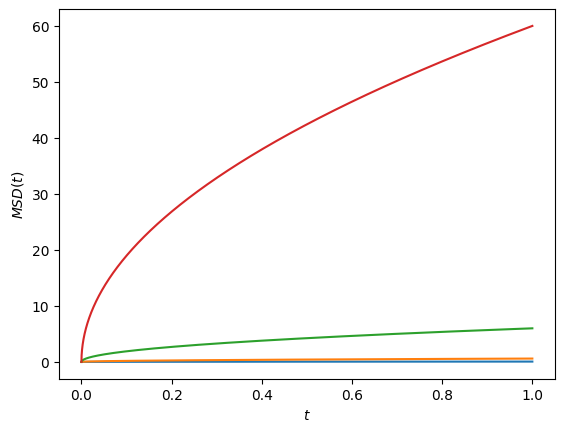

In [13]:
d=3 
t= np.linspace(0, 1, 10000)

for D in [0.01, 0.1, 1, 10]:
    
    plt.plot(t, 2*d *D * t**0.5)
    #plt.loglog(t, 2*d *D * t**0.5)

plt.ylabel('$MSD(t)$')
plt.xlabel('$t$')

### Brownian motion

- The Brownian motion describes the motion of a particle suspended in a solvent consisting of much smaller moleules. The displacement of particle is generatd by a sum of large number of independent random collisions with solvent molecules. Hence we invoke Central Limit Theorem to approximate displacement at each $dt$ as a normalally idstributed random variable:

$$x(t+dt)-x(t)=N(0,\sqrt{2D dt})$$ 

- We assume we have started at position $\mu=0$, and our variance is given by $\sigma^2=2Dt$, Where D is the diffusion coefficient, which is related to the parameters of the discrete random walk as shown in the lecture.  

$$x(t+dt)=x(t)+\sqrt{2D dt} \cdot N(0,1)$$ 

- In the last step, we re-wrote Brownian motion equation in a convenient way by shifting the normally distributed random variable by mean and scaling by standard deviation $N(\mu, \sigma^2) = \mu + \sigma N(0,1)$

In [14]:
def brown(T, N, dt=1, D=1, d=3):
    
    """
    Creates 3D brownian path given:
    time T 
    N=1 trajecotires
    dt=1 timestep
    D=1 diffusion coeff
    returns np.array with shape (N, T, 3)
    """
    
    n = int(T/dt) # how many points to sample
    
    dR = np.sqrt(2*D*dt) * np.random.randn(N, n, d) # 3D position of brownian particle
    
    R = np.cumsum(dR, axis=1) # accumulated 3D position of brownian particle
    
    return R

In [15]:
R=brown(T=3000, N=1000)
print(R.shape)

(1000, 3000, 3)


In [16]:
def brownian_plot(t=10):
    
    fig, ax = plt.subplots(ncols=2)
    
    ax[0].plot(R[:5, :t, 0].T, R[:5, :t, 1].T);
    
    ax[1].hist(R[:, 10, 0], density=True, color='red')
    ax[1].hist(R[:, t, 0], density=True)
    
    ax[1].set_ylim([0,0.1])
    
    ax[0].set_ylim([-200, 200])
    ax[0].set_xlim([-200, 200])
    
    fig.tight_layout()

In [17]:
import holoviews as hv
hv.extension('plotly')

plots = []
for i in range(10):
    
    plot = hv.Path3D(R[i,:,:], label='3D random walk').opts(width=600, height=600, line_width=5)
    plots.append(plot)
    
hv.Overlay(plots) 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Overlay
   .Path3D.A_3D_random_walk.I    :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.II   :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.III  :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.IV   :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.V    :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.VI   :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.VII  :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.VIII :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.IX   :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.X    :Path3D   [x,y,z]

In [46]:
rw_curve = [hv.Curve((R[i,:,0], R[i,:,1])) for i in range(10)]

xdist = hv.Distribution(R[:,10,0], ['X'], ['P(X)'])
ydist = hv.Distribution(R[:,10,1], ['Y'], ['P(Y)'])

hv.Overlay(rw_curve) << ydist << xdist

:AdjointLayout
   :Overlay
      .Curve.I    :Curve   [x]   (y)
      .Curve.II   :Curve   [x]   (y)
      .Curve.III  :Curve   [x]   (y)
      .Curve.IV   :Curve   [x]   (y)
      .Curve.V    :Curve   [x]   (y)
      .Curve.VI   :Curve   [x]   (y)
      .Curve.VII  :Curve   [x]   (y)
      .Curve.VIII :Curve   [x]   (y)
      .Curve.IX   :Curve   [x]   (y)
      .Curve.X    :Curve   [x]   (y)
   :Distribution   [Y]   (P(Y))
   :Distribution   [X]   (P(X))

### Diffusion Equation

The movement of individual random walkers $\leftrightarrow$ density of walkers $\rho(\vec{r},t)$. Formulated empirically as [Fick's laws](https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion)

$$\frac{\partial\rho}{\partial t} = \mathcal{D}\nabla^2\rho$$

- This is a 2nd order PDE! Unlike equations of motion diff eq shows irreersibile behaviour 
- This one exactly solvable. But in general reaction-diffusion PDEs difficult to solve analytically.
- Can solve numerically by writing derivatives as finite differences!
- Can also simulate via random walk!
- Diffusion coefficient $D$, Units $[L^2]/[T]$

Important special case solution (here written in 1d):

$$\rho(x,t) = \frac{1}{\sqrt{2\pi \sigma(t)^2}}\exp\left(-\frac{x^2}{2\sigma(t)^2}\right),$$

where $\sigma(t)=\sqrt{2{D}t}$

- density remains Gaussian and Gaussian becomes wider with time1
- check that this is indeed a solution by plugging into the diffusion equation!

In [15]:
def sigma(t, D = 1):
    return np.sqrt(2*D*t)

def gaussian(x, t):
    return  1/np.sqrt(2*np.pi*sigma(t)**2) * np.exp(-x**2/(2*sigma(t)**2)) #

In [81]:
def diffusion(t=0.001):
    
    R = brown(T=101, N=1000)
    x = np.linspace(-20, 20, 100)
    
    plt.plot(x, gaussian(x, 1), '--', color='orange', label='t=0')
    
    plt.plot(x, gaussian(x, t), lw=3, color='green', label=f't={t}')
    
    plt.hist(R[:,t,0], density=True, alpha=0.6, label='simulation hist')
    
    plt.legend()
    plt.ylabel('$p(x)$')
    plt.xlabel('$x$')
    plt.xlim([-25, 25])

interactive(children=(IntSlider(value=1, description='t', min=1), Output()), _dom_classes=('widget-interact',)…